# Introdução

## Importação das bibliotecas necessarias

In [6]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [7]:
csvs = glob.glob(os.path.join('../csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [8]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [9]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2016


In [10]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)


Dropdown(description='Indicadores:', index=41, options=('Q-121-proporcao_nascidos_vivos_com_numero_de_consulta…

In [11]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)
'''
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')
'''

../csv_files/Q-01-proporcao_gravidez_idade_menor_que_20.csv


"\nnome_estado = estados_select.value\nprint(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')\n"

In [12]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('../csv_files/Estados.csv')
df_municipios = pd.read_csv('../csv_files/Municipios.csv')
df

,CODMUNRES,ano_nasc,Qtd_Menor20,Qtd_Total,Ratio
0,110000,2012,1.0,2,0.500000
1,110000,2013,9.0,16,0.562500
2,110000,2014,0.0,4,0.000000
3,110000,2015,1.0,4,0.250000
4,110000,2016,1.0,2,0.500000
...,...,...,...,...,...
44678,530010,2015,7600.0,46122,0.164780
44679,530010,2016,6905.0,43340,0.159322
44680,530010,2017,6699.0,44568,0.150310
44681,530010,2018,6316.0,44195,0.142912


In [13]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2] 
indicador_1 =   df.columns[3] 
#total =         df.columns[3] 
#ratio =         df.columns[4] 
total =         df.columns[5] 
ratio =         df.columns[6] 
print(coluna_codigo,ano,indicador,indicador_1,total,ratio)

IndexError: index 5 is out of bounds for axis 0 with size 5

In [14]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [15]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [93]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

3019 Municípios registrados no país


In [16]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


NameError: name 'total' is not defined

In [17]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Abadia dos Dourados', 'Abaeté', 'Abre Campo', 'Acaiaca', 'Açucena…

In [18]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'310010'

In [97]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,Ano,OICFSI,OISFSI,ONI,Total,Indicador
4703,330455,2012,56,3,0,59,100.0
4704,330455,2013,67,0,0,67,100.0
4705,330455,2014,64,0,0,64,100.0
4706,330455,2015,65,0,0,65,100.0
4707,330455,2016,62,0,0,62,100.0
4708,330455,2017,70,0,0,70,100.0
4709,330455,2018,50,0,0,50,100.0
4710,330455,2019,62,0,0,62,100.0


In [98]:
nome_indicador = nome_arquivo_indicador.replace('-',' ').replace('_',' ').upper()[3:]
print(nome_indicador)

5 PROPORCAO OBITOS MATERNOS DECLARADOS INVESTIGADO


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

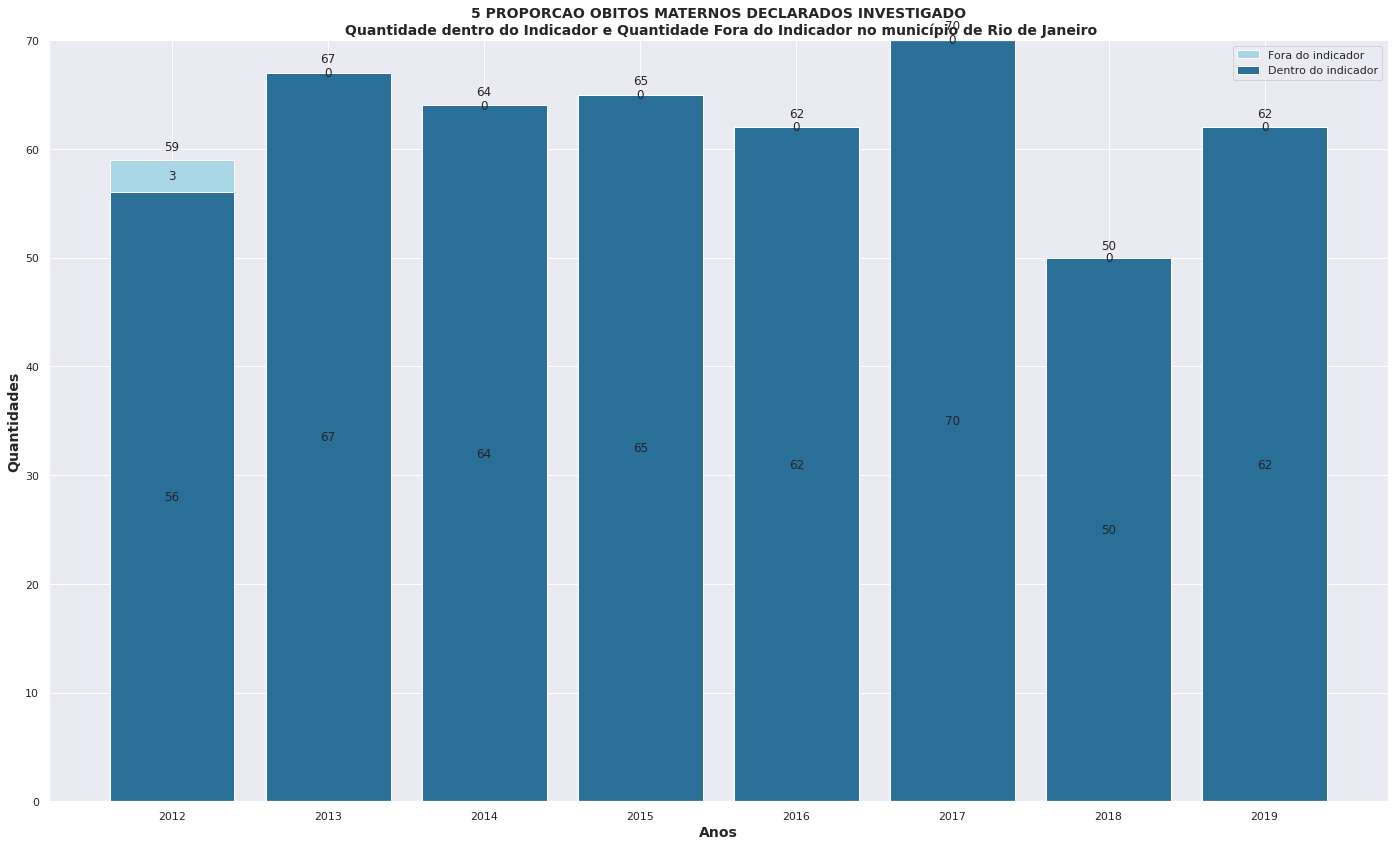

In [99]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [100]:
subset_mun.head()

,CODMUNRES,Ano,OICFSI,OISFSI,ONI,Total,Indicador
4703,330455,2012,56,3,0,59,100.0
4704,330455,2013,67,0,0,67,100.0
4705,330455,2014,64,0,0,64,100.0
4706,330455,2015,65,0,0,65,100.0
4707,330455,2016,62,0,0,62,100.0


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

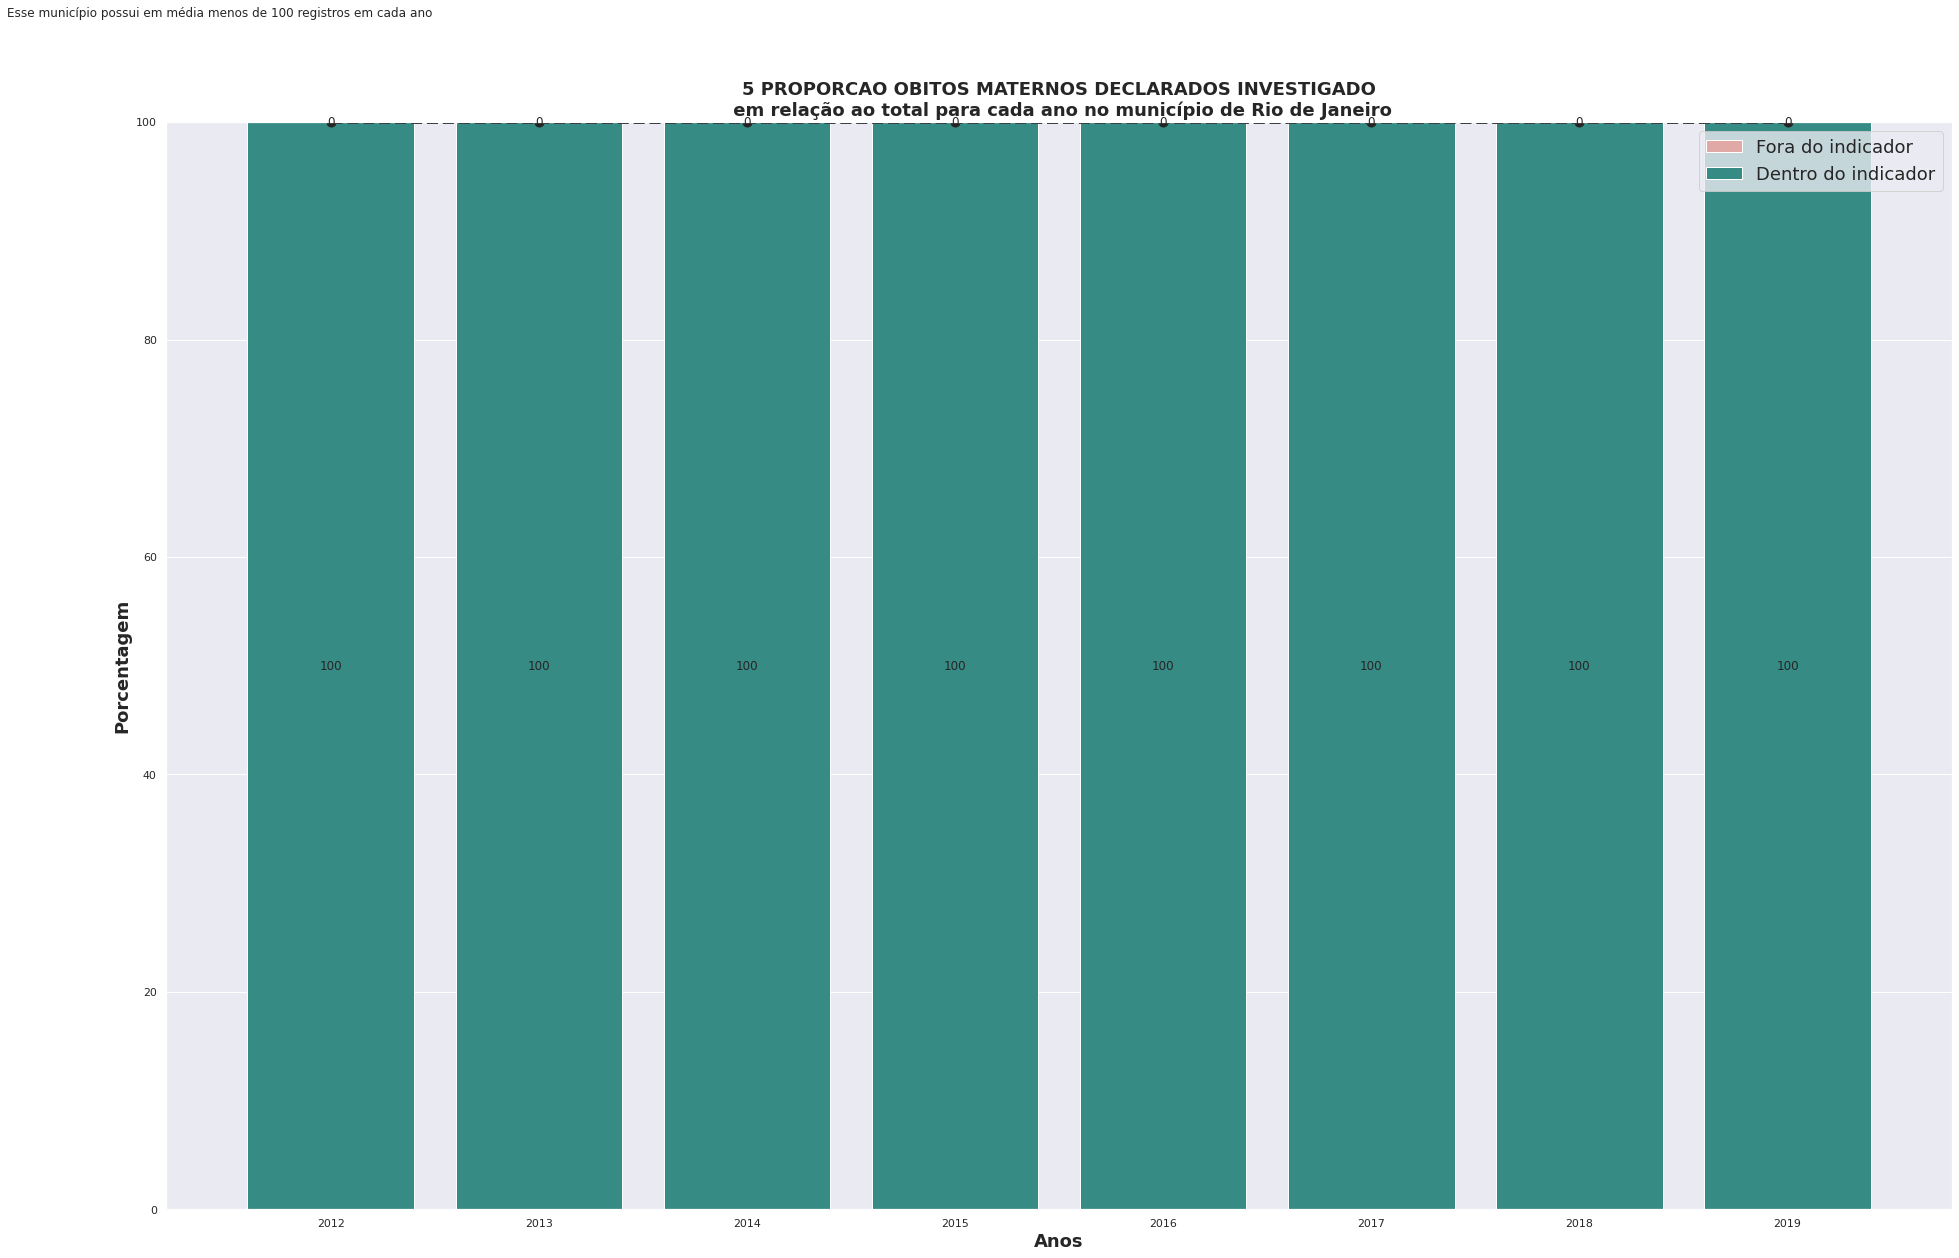

In [101]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(1*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 1*subset_mun[ratio], decimals=2) , bottom= np.round(1*subset_mun[ratio], decimals=2), color ='#E1A9A5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(1*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [102]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[indicador_1] = subset_nao_ignorado[indicador_1].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', indicador_1:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = ((df_grouped_by_state[indicador]+df_grouped_by_state[indicador_1])/df_grouped_by_state[total])*100
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

76 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador 5 PROPORCAO OBITOS MATERNOS DECLARADOS INVESTIGADO 

     COD_UF   Ano  OICFSI  OISFSI  Total  Indicador
144      33  2012     151      13    179  91.620112
145      33  2013     166       5    179  95.530726
146      33  2014     162       3    166  99.397590
147      33  2015     150       6    159  98.113208
148      33  2016     148       1    156  95.512821
149      33  2017     166       2    171  98.245614
150      33  2018     133       0    136  97.794118
151      33  2019     142       1    155  92.258065


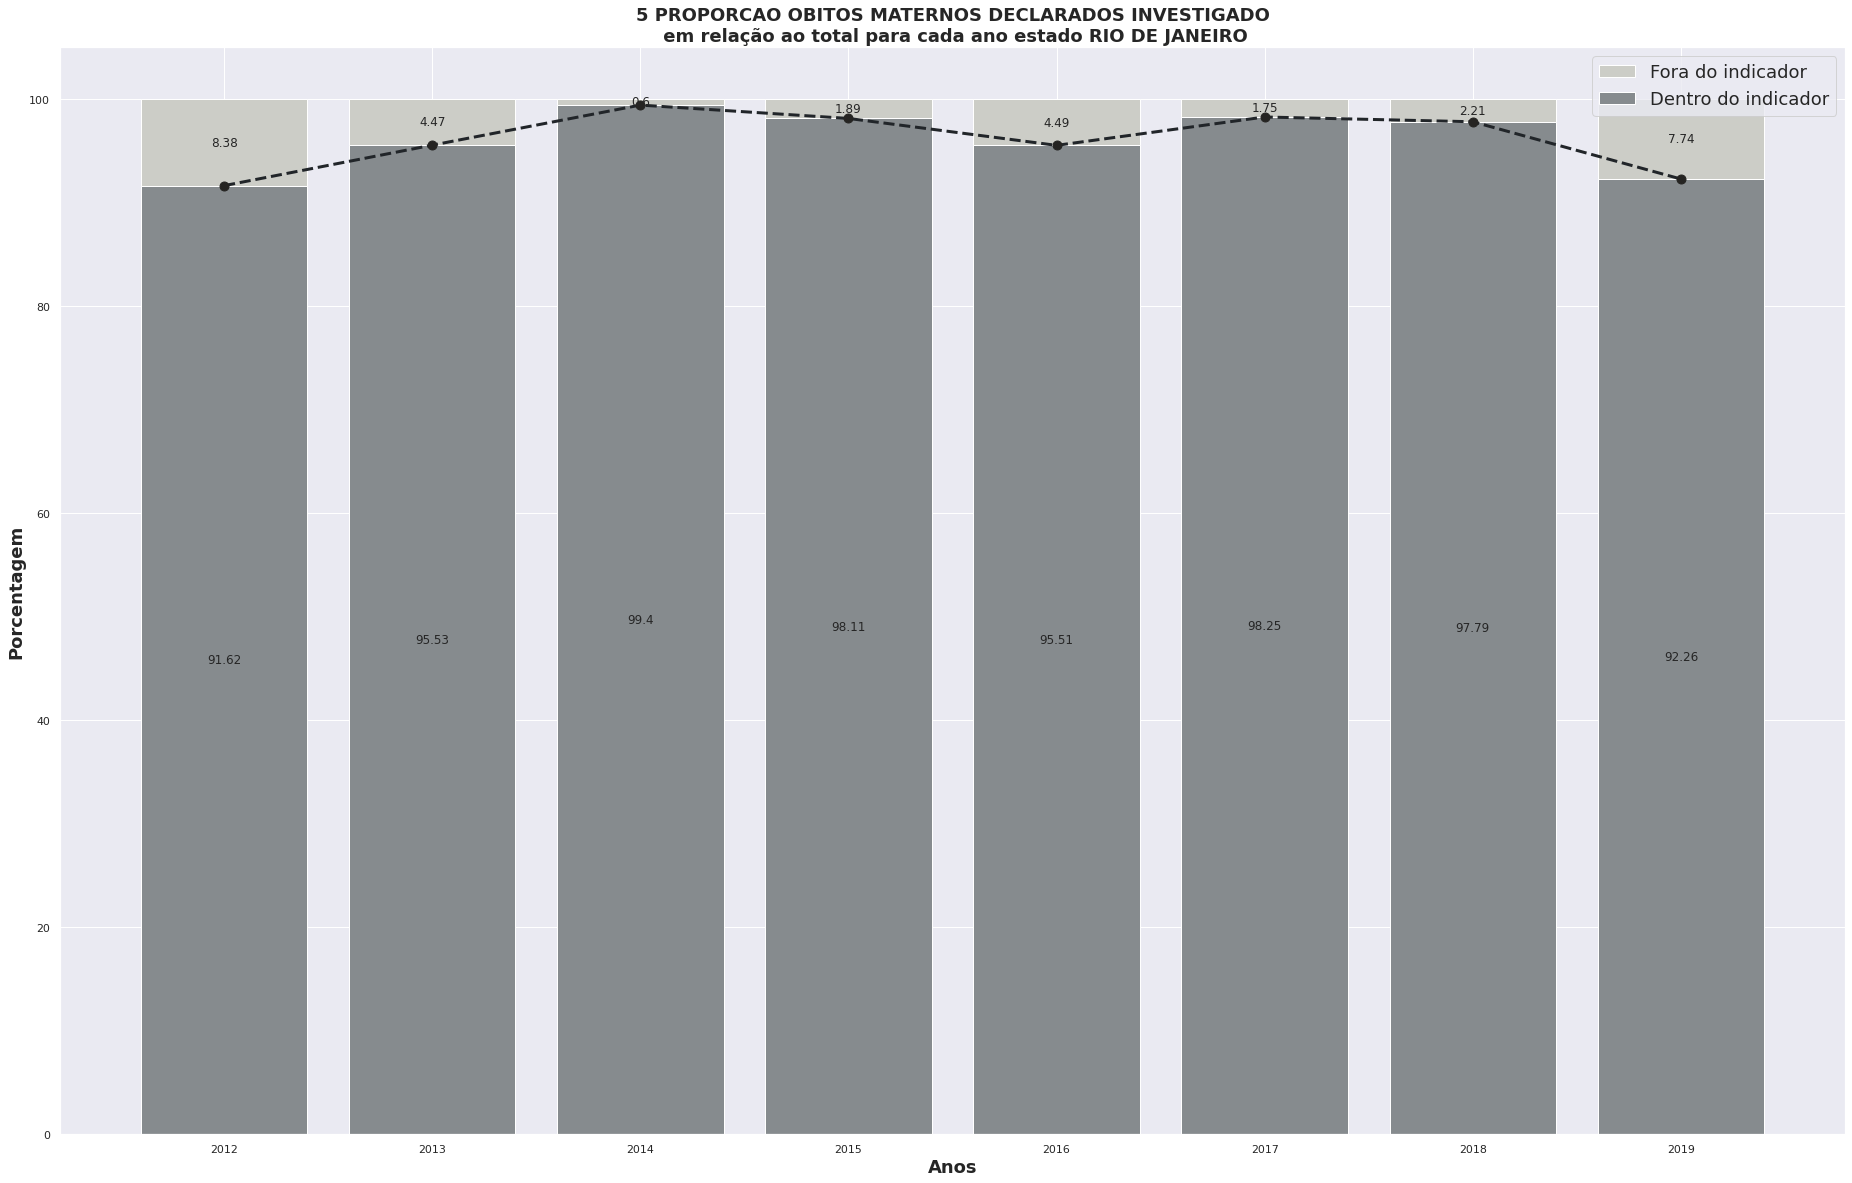

In [103]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(1*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 1*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(1*df_estado_acumulado[ratio], decimals=2), color ='#CCCDC7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(1*df_estado_acumulado[ratio], decimals=2), color ='#868B8E', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('../Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [104]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
#sudeste.to_csv('../csv_files/37-sudeste.csv',index=False)

     CODMUNRES   Ano  OICFSI  OISFSI  ONI  Total  Indicador
3693    310020  2019       1       0    0      1      100.0
3694    310060  2014       0       0    1      1        0.0
3695    310060  2017       1       0    0      1      100.0
3696    310090  2014       1       0    0      1      100.0
3697    310110  2012       1       0    0      1      100.0
...        ...   ...     ...     ...  ...    ...        ...
5640    355700  2013       1       0    1      2       50.0
5641    355700  2016       1       0    0      1      100.0
5642    355700  2017       0       0    1      1        0.0
5643    355710  2012       1       0    0      1      100.0
5644    355710  2014       1       0    0      1      100.0

[1948 rows x 7 columns]


In [105]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()
        
    soma_anos_indicador_1 = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador_1[i] = dataframe.loc[dataframe[ano]==anos[i], indicador_1 ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_indicador_1, soma_anos_total, np.round(((soma_anos_indicador+soma_anos_indicador_1)/soma_anos_total)*100,4)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,indicador_1,total,ratio])
    
    return acumulado

In [106]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO   Ano  OICFSI  OISFSI  Total  Indicador
0    Sudeste  2019     519      17    582    92.0962
1    Sudeste  2014     579       9    610    96.3934
2    Sudeste  2017     630      13    670    95.9701
3    Sudeste  2014     579       9    610    96.3934
4    Sudeste  2012     485      18    527    95.4459
5    Sudeste  2015     606       9    631    97.4643
6    Sudeste  2017     630      13    670    95.9701
7    Sudeste  2012     485      18    527    95.4459

   NOMEREGIAO   Ano  OICFSI  OISFSI  Total  Indicador
0        Sul  2012     159       9    183    91.8033
1        Sul  2014     147       1    149    99.3289
2        Sul  2016     153       0    157    97.4522
3        Sul  2012     159       9    183    91.8033
4        Sul  2014     147       1    149    99.3289
5        Sul  2015     164       2    166   100.0000
6        Sul  2018     144       0    146    98.6301
7        Sul  2016     153       0    157    97.4522

      NOMEREGIAO   Ano  OICFSI  OISFSI  Tot

In [107]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,Ano,OICFSI,OISFSI,Total,Indicador
0,Norte,2015,206,1,214,96.7290
1,Norte,2012,159,5,193,84.9741
2,Norte,2013,202,9,232,90.9483
3,Norte,2014,246,3,253,98.4190
4,Norte,2015,206,1,214,96.7290
5,Norte,2016,222,0,223,99.5516
6,Norte,2017,235,1,240,98.3333
7,Norte,2019,228,0,233,97.8541
0,Nordeste,2012,464,14,546,87.5458
1,Nordeste,2016,478,12,537,91.2477


In [108]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
     CODMUNRES   Ano  OICFSI  OISFSI  ONI  Total  Indicador
3693    310020  2019       1       0    0      1      100.0
3694    310060  2014       0       0    1      1        0.0
3695    310060  2017       1       0    0      1      100.0
3696    310090  2014       1       0    0      1      100.0
3697    310110  2012       1       0    0      1      100.0
...        ...   ...     ...     ...  ...    ...        ...
5640    355700  2013       1       0    1      2       50.0
5641    355700  2016       1       0    0      1      100.0
5642    355700  2017       0       0    1      1        0.0
5643    355710  2012       1       0    0      1      100.0
5644    355710  2014       1       0    0      1      100.0

[1948 rows x 7 columns]


In [109]:
regiao_acumulada[ano]

0    2019
1    2014
2    2017
3    2014
4    2012
5    2015
6    2017
7    2012
Name: Ano, dtype: int64

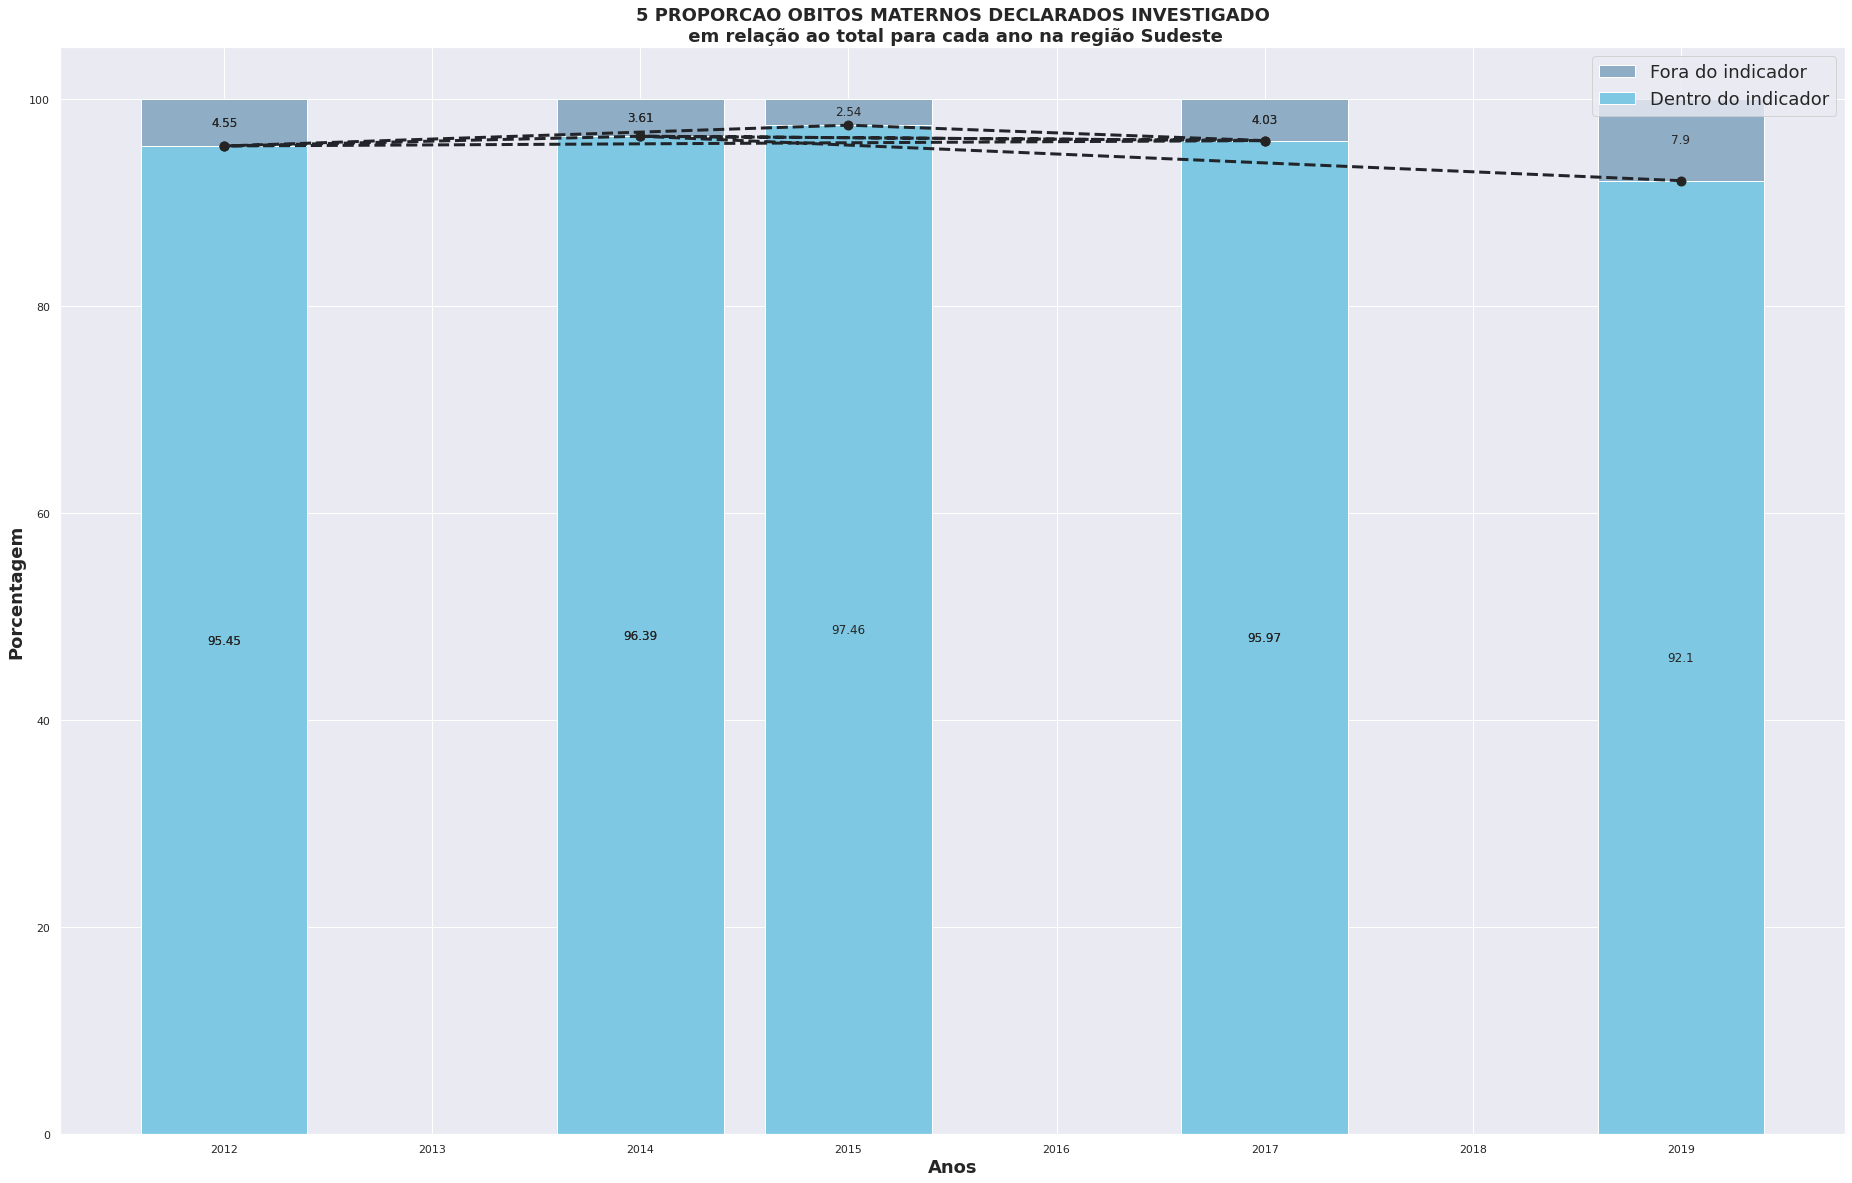

In [110]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(1*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 1*regiao_acumulada[ratio], decimals=2) , bottom= np.round(1*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(1*regiao_acumulada[ratio], decimals=2), color ='#7EC8E3', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico3', bbox_inches='tight')
plt.show()

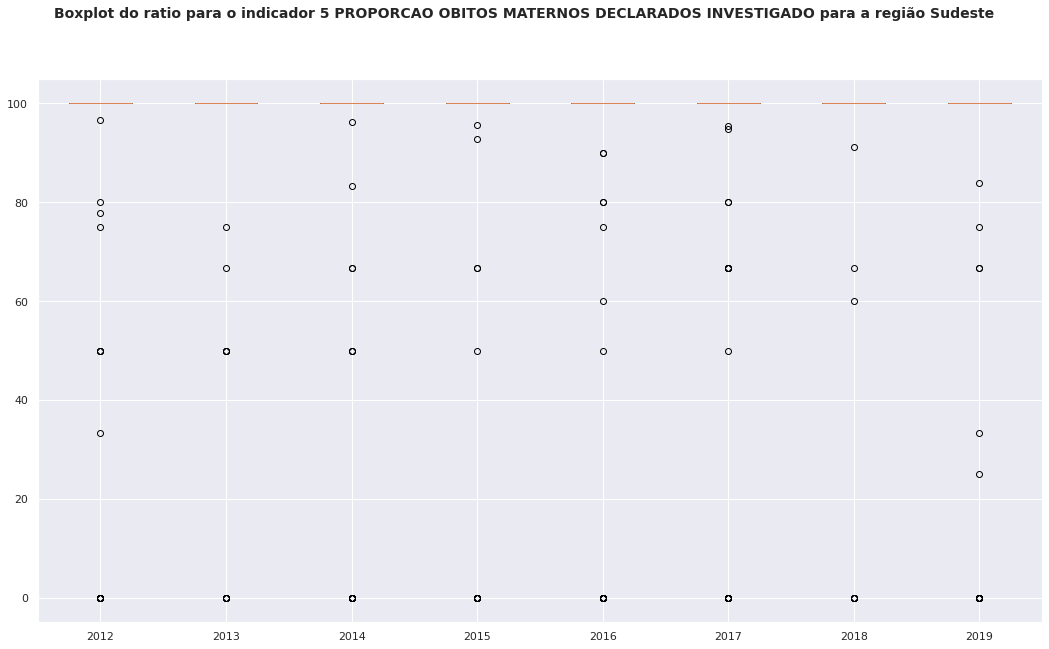

In [111]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [112]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

     CODMUNRES   Ano  OICFSI  OISFSI  ONI  Total   Indicador
4490    330010  2012       0       1    2      3   33.333333
4491    330010  2013       4       0    0      4  100.000000
4492    330010  2014       1       0    0      1  100.000000
4493    330010  2017       3       0    0      3  100.000000
4494    330010  2018       1       0    0      1  100.000000
...        ...   ...     ...     ...  ...    ...         ...
4786    330630  2014       2       0    0      2  100.000000
4787    330630  2015       1       0    0      1  100.000000
4788    330630  2016       1       0    0      1  100.000000
4789    330630  2017       1       0    0      1  100.000000
4790    330630  2019       2       0    0      2  100.000000

[301 rows x 7 columns]


In [113]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

    Ano  OICFSI  OISFSI  Total  Indicador
0  2015    1648      23   1738    96.1450
1  2012    1383      49   1581    90.5756
2  2013    1538      40   1685    93.6499
3  2014    1628      28   1739    95.2271
4  2015    1648      23   1738    96.1450
5  2016    1562      20   1668    94.8441
6  2017    1625      25   1718    96.0419
7  2019    1447      30   1576    93.7183


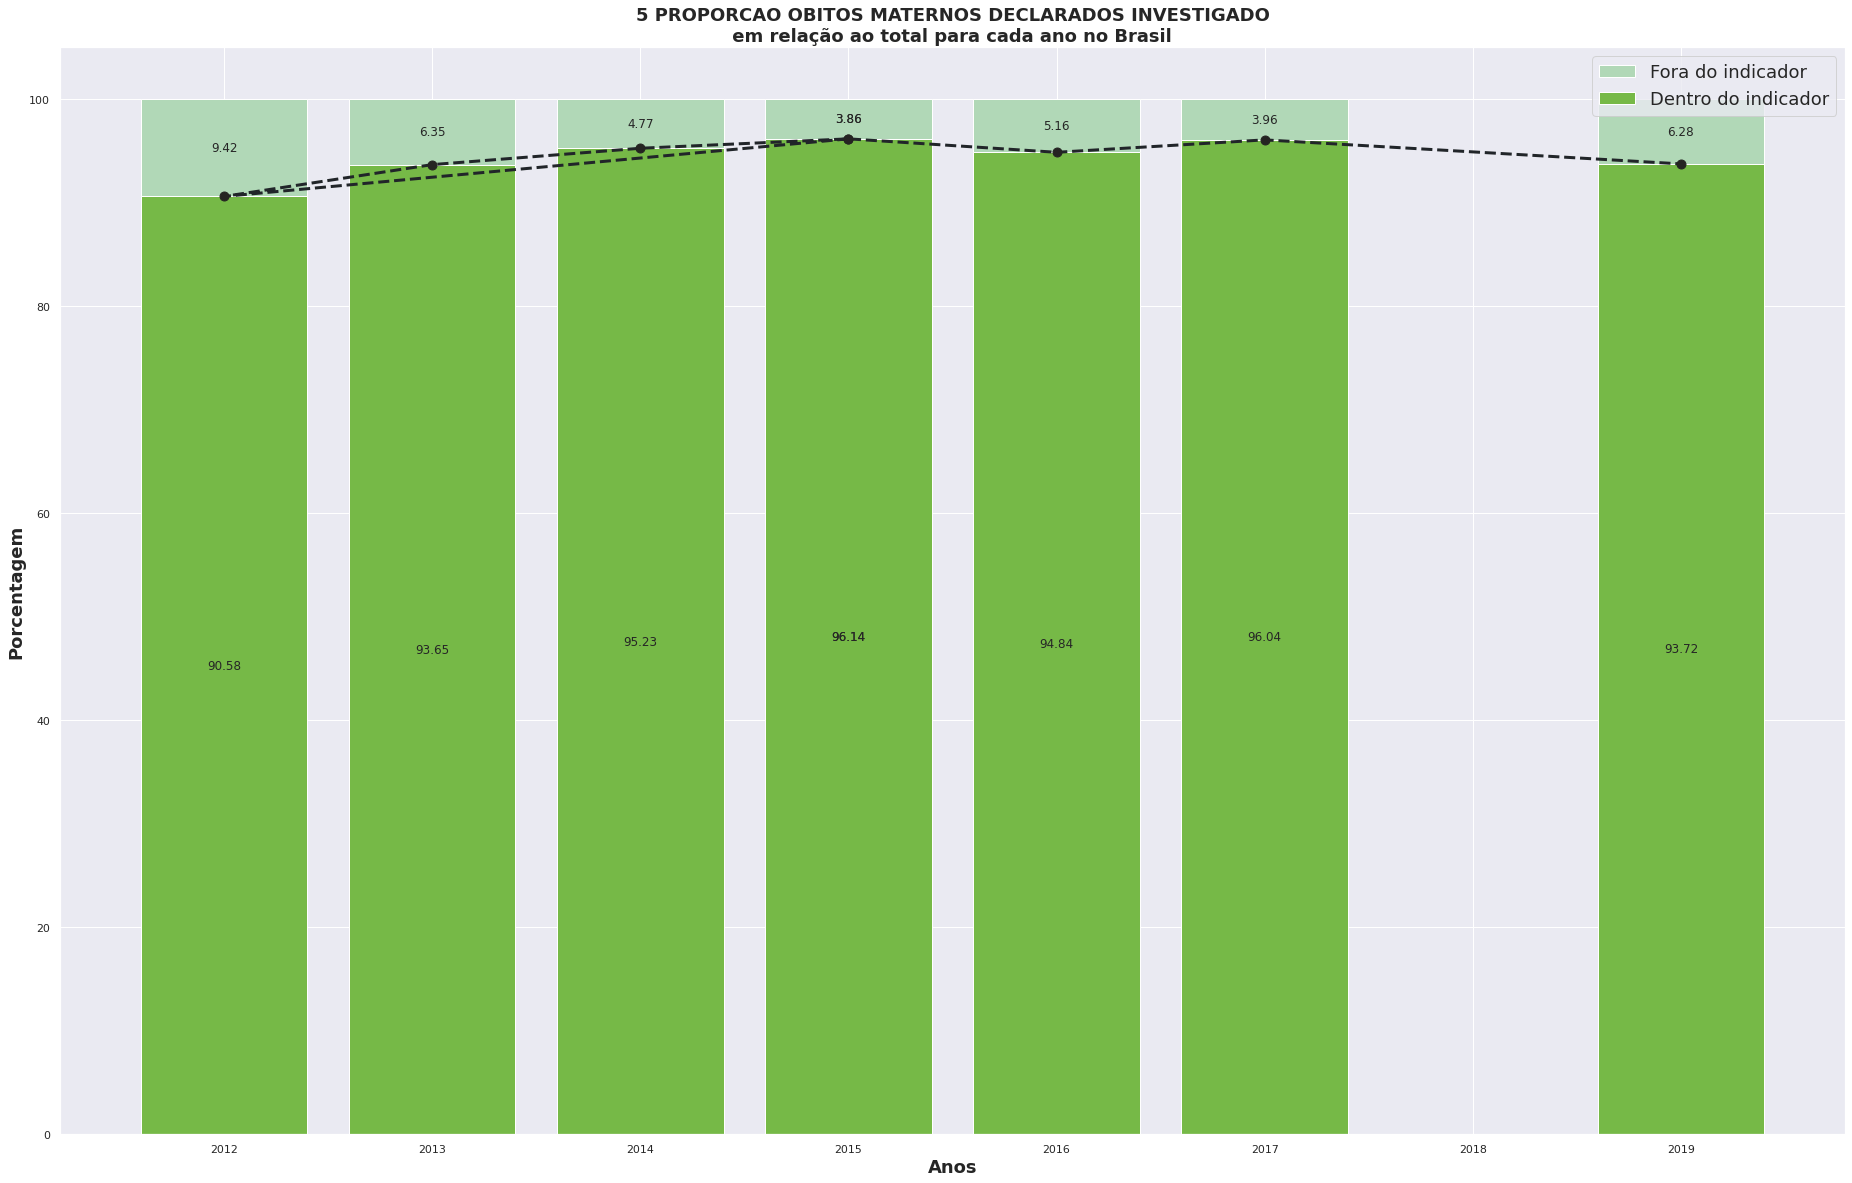

In [114]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(1*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 1*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(1*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(1*df_brasil_acumulado[ratio], decimals=2), color ='#76B947', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no Brasil ", **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('../Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [115]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF   Ano  OICFSI  OISFSI  Total   Indicador
0        11  2012      16       0     17   94.117647
1        11  2013      18       0     18  100.000000
2        11  2014      21       0     22   95.454545
3        11  2015      13       0     14   92.857143
4        11  2016      15       0     15  100.000000
..      ...   ...     ...     ...    ...         ...
211      53  2015      16       0     16  100.000000
212      53  2016      24       0     24  100.000000
213      53  2017      21       0     21  100.000000
214      53  2018      23       1     24  100.000000
215      53  2019       9       0      9  100.000000

[216 rows x 6 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

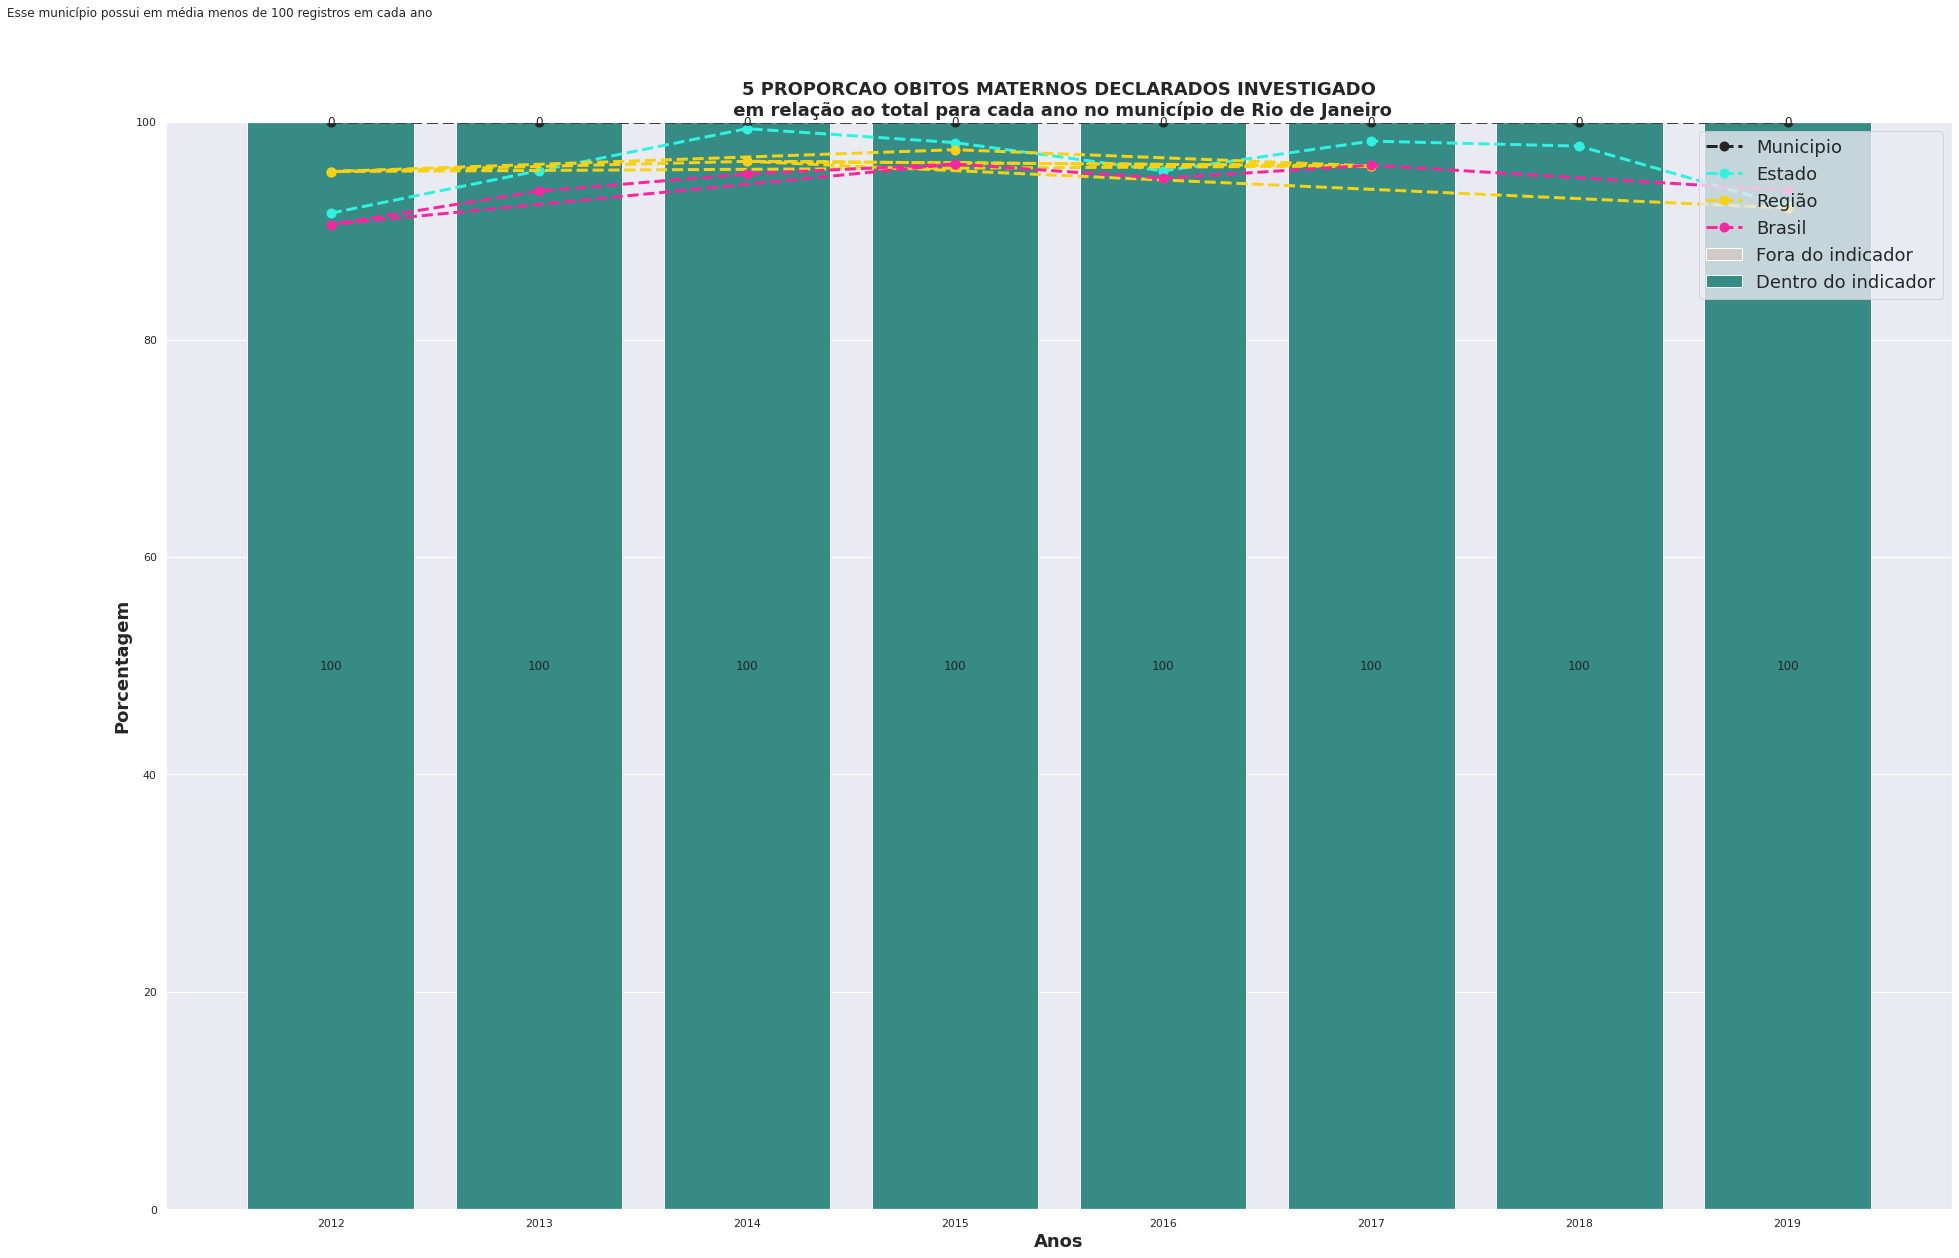

In [116]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(1*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(1*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(1*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(1*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 1*subset_mun[ratio], decimals=2) , bottom= np.round(1*subset_mun[ratio], decimals=2), color ='#D1C9C5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(1*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('../Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

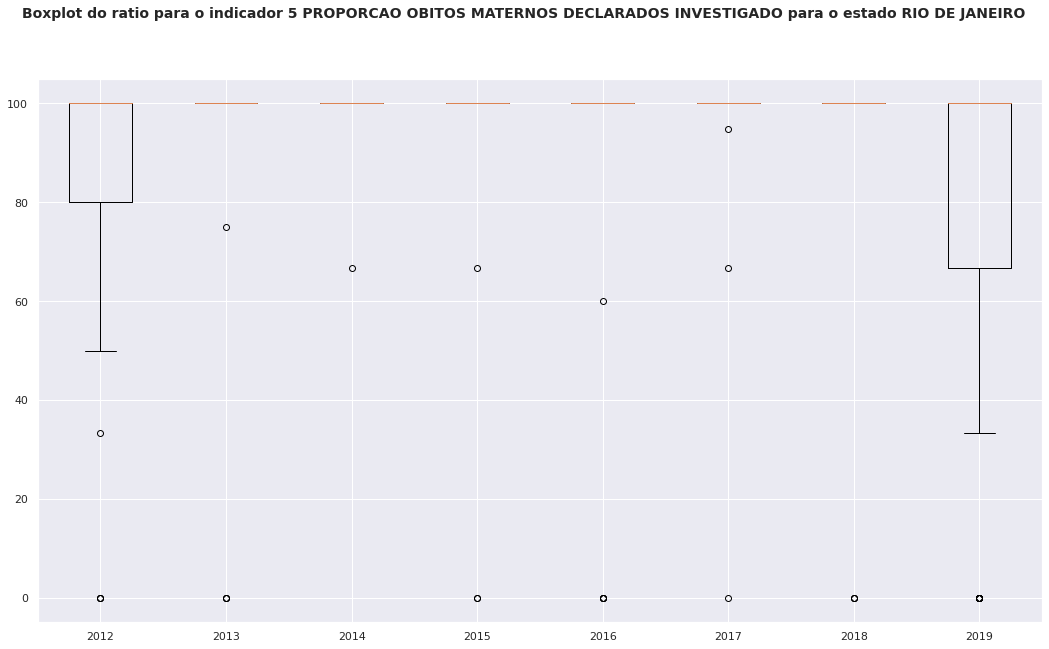

In [117]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [118]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,Ano,OICFSI,OISFSI,ONI,Total,Indicador
5,110002,2016,2,0,0,2,100.0
9,110004,2016,1,0,0,1,100.0
10,110005,2016,1,0,0,1,100.0
11,110006,2016,1,0,0,1,100.0
32,110020,2016,8,0,0,8,100.0


In [119]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,Ano,OICFSI,OISFSI,Total,Indicador
4,11,2016,15,0,15,100.000000
12,12,2016,9,0,9,100.000000
20,13,2016,55,0,55,100.000000
28,14,2016,6,0,6,100.000000
36,15,2016,102,0,103,99.029126
44,16,2016,17,0,17,100.000000
52,17,2016,18,0,18,100.000000
60,21,2016,93,3,110,87.272727
68,22,2016,38,0,38,100.000000
76,23,2016,73,1,74,100.000000


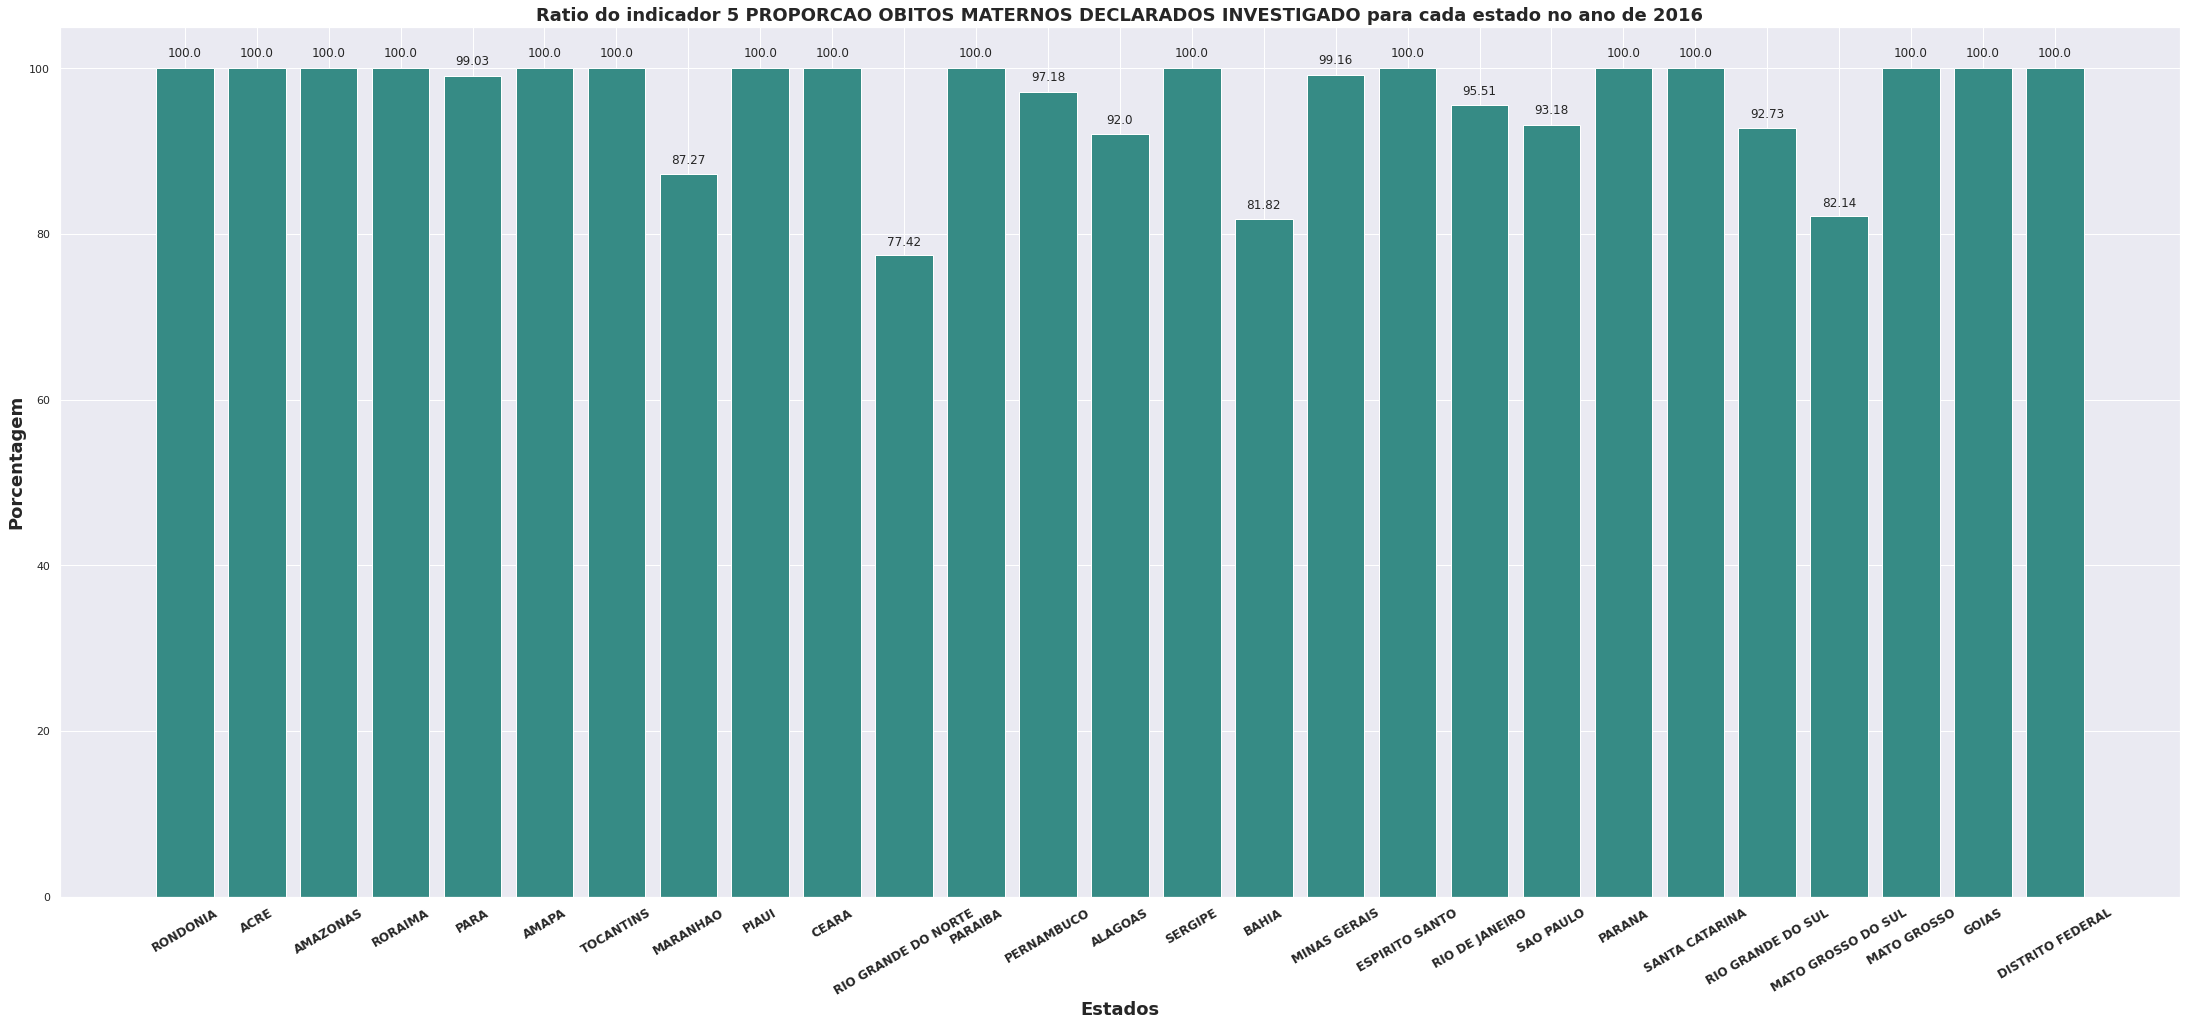

In [120]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Ratio do indicador " + nome_indicador +" para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Porcentagem',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],1*merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('../Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

5           Norte
1        Nordeste
2             Sul
7             Sul
0    Centro Oeste
5    Centro Oeste
Name: NOMEREGIAO, dtype: object

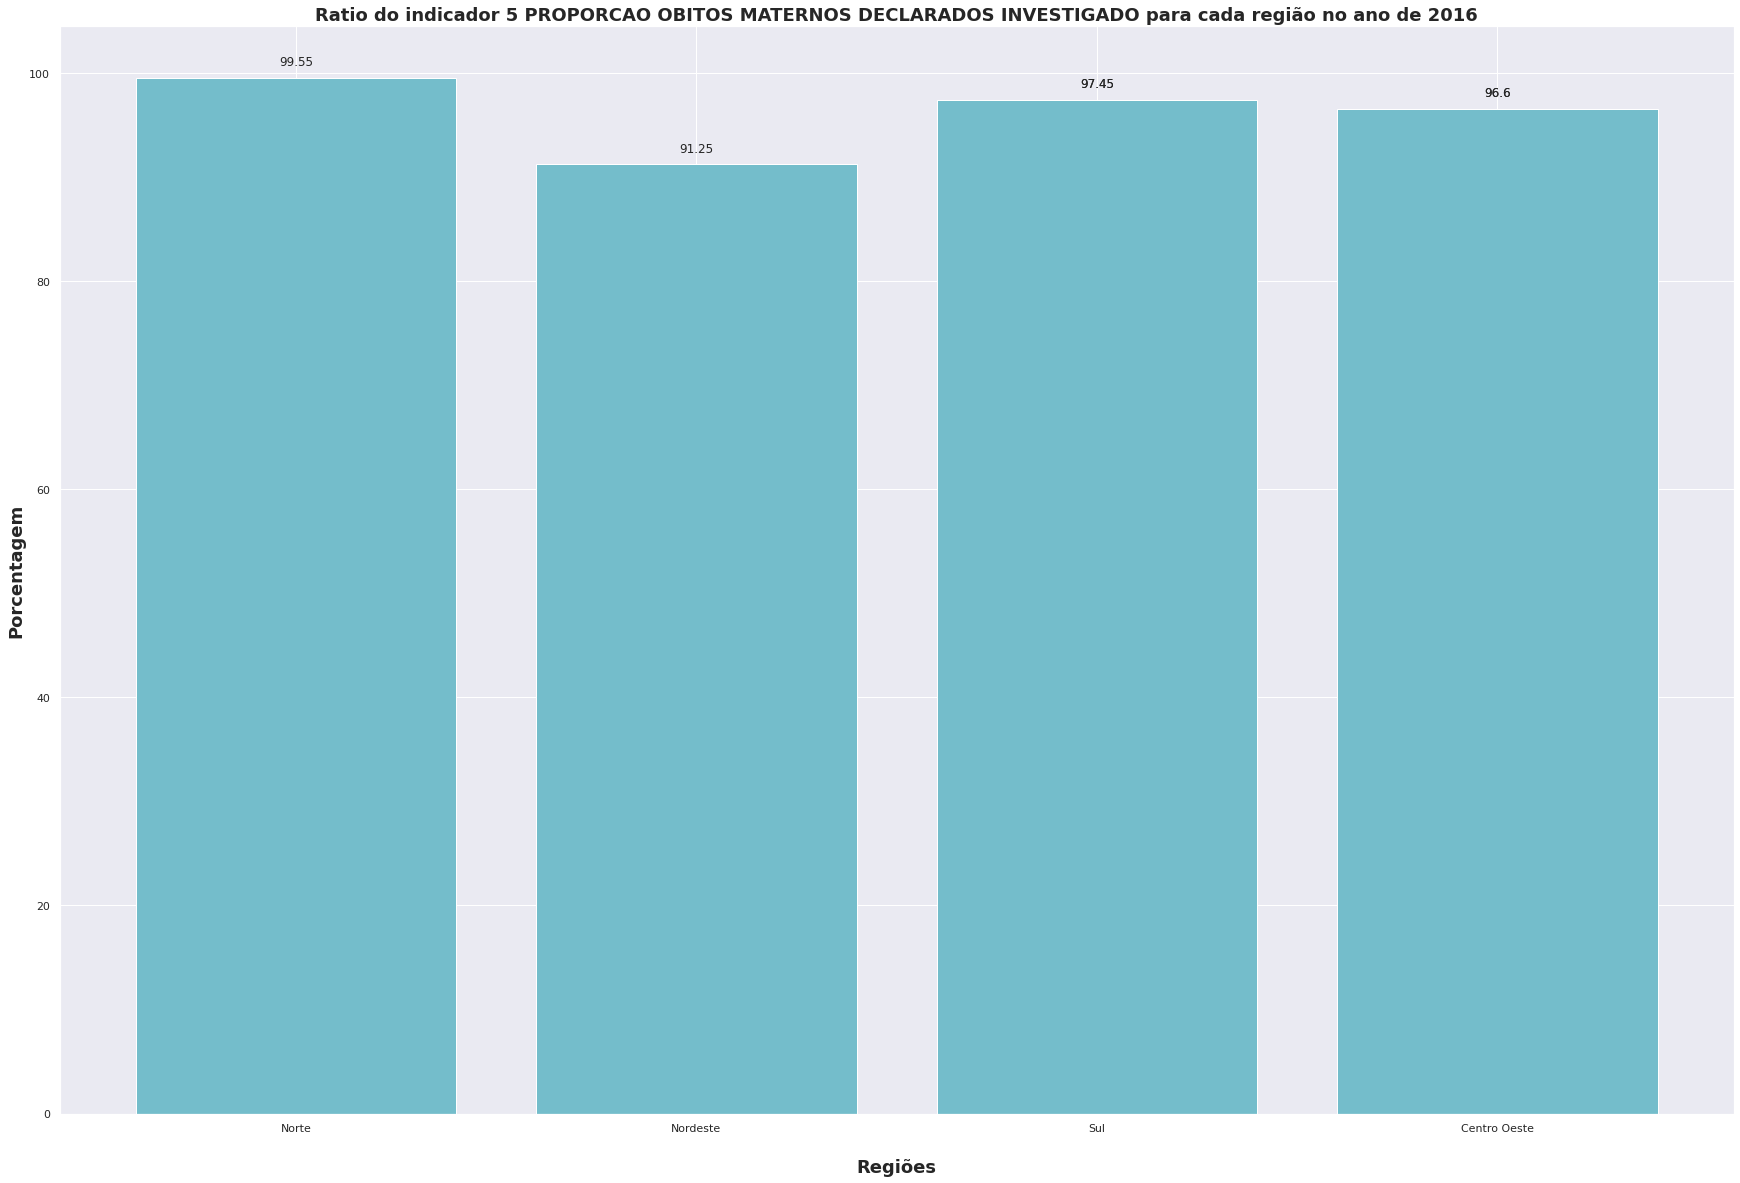

In [124]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Ratio do indicador " + nome_indicador +" para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Porcentagem',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],1*aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

#plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

#plt.savefig('../Imagens/10-grafico7', bbox_inches='tight')
#plt.show()
aux['NOMEREGIAO']

# Refazer as médias

In [301]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2016 ), no Brasil:  2482.5925925925926
Mediana do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:  1245.0
Quartis do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Media estadual do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no Brasil:  1477.5185185185185
Mediana do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:  709.0
Quartis do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Dataframe agrupado por estado no ano de  2016 

     COD_UF   Ano  Qtd_Obitos_Investigados  Qtd_Total    

In [302]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [303]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  72.8695652173913
Media municipal do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  433.6195652173913


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [262]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,1.038126
std,0.508131
min,0.458553
25%,0.663029
50%,0.962927
75%,1.223806
max,2.651692


In [1861]:
df_to_describe

,Ratio
COD_UF,
11,0.697050
12,0.785376
13,0.847444
14,0.703706
15,0.891087
16,0.838350
17,0.829189
21,0.837696
22,0.818170


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [1862]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,0.560016
std,0.299962
min,0.000000
25%,0.273966
50%,0.622585
75%,0.840240
max,0.989620


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [1863]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

           Ratio
count  92.000000
mean    0.568746
std     0.122096
min     0.301044
25%     0.490306
50%     0.569489
75%     0.638572
max     0.838296
0.4903064131515108
